In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_df = pd.read_csv("../datasets/Student_Performance.csv")
df = student_df.copy()
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes" : 1, "No" : 0})
df.head()

C:\Users\saipr\AppData\Local\Temp\ipykernel_17812\299636497.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"] = df["Extracurricular Activities"].replace({"Yes" : 1, "No" : 0})


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.25, random_state=42)

In [5]:
display(x_train[:5], y_train[:5])

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
4901,5,49,0,5,5
4375,7,88,1,4,9
6698,3,94,1,7,1
9805,9,54,1,5,9
1101,4,56,1,8,6


4901    33.0
4375    82.0
6698    74.0
9805    49.0
1101    43.0
Name: Performance Index, dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
display(x_train[:5], x_test[:5])

array([[ 0.00796272, -1.19062085, -0.98912579, -0.90874945,  0.13314392],
       [ 0.77854894,  1.05902612,  1.01099376, -1.49731775,  1.53122497],
       [-0.76262349,  1.40512565,  1.01099376,  0.26838714, -1.26493713],
       [ 1.54913515, -0.90220458,  1.01099376, -0.90874945,  1.53122497],
       [-0.37733038, -0.78683806,  1.01099376,  0.85695544,  0.48266418]])

array([[ 0.00796272, -0.03695574, -0.98912579,  0.85695544, -0.91541687],
       [-1.14791659, -1.36367062,  1.01099376, -1.49731775,  1.18170471],
       [ 0.77854894, -0.78683806,  1.01099376,  0.26838714,  0.13314392],
       [ 0.39325583, -1.59440364,  1.01099376,  0.85695544,  0.13314392],
       [ 0.77854894, -0.95988783, -0.98912579, -1.49731775,  0.48266418]])

In [9]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [10]:
regression.fit(x_train, y_train)

LinearRegression()

In [11]:
print(f"Slope or Coefficient : {regression.coef_} \nIntercept or Constant : {regression.intercept_}")

Slope or Coefficient : [ 7.40973867 17.62000334  0.29183721  0.81024328  0.54624431] 
Intercept or Constant : 55.41839999999999


In [12]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(regression, x_train, y_train, cv=3)
score

array([0.98830026, 0.98881004, 0.9887372 ])

In [13]:
np.mean(score)

np.float64(0.9886158310203988)

In [14]:
y_pred = regression.predict(x_test)
y_pred

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372], shape=(2500,))

### Performance Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error : {mse} \nMean Absolute Error : {mae} \nRoot Mean Squared Error : {rmse}")

Mean Squared Error : 4.032544215419119 
Mean Absolute Error : 1.5975792091646117 
Root Mean Squared Error : 2.0081195719924447


## R2

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.9890550757439104

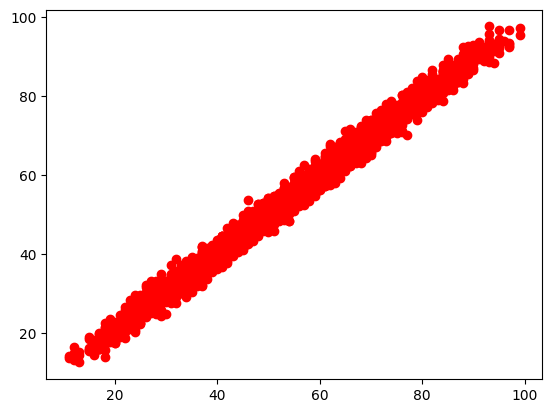

In [17]:
plt.scatter(y_test, y_pred, color="red")
plt.show()

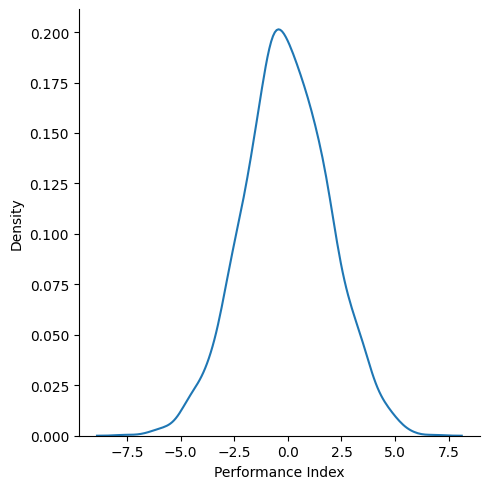

In [18]:
sns.displot(y_test-y_pred, kind="kde")
plt.show()